In [17]:
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#2.-First-things-first:-analysing-'SalePrice'
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
warnings.filterwarnings('ignore')
%matplotlib inline

Reading data

In [3]:
df_train = pd.read_csv("/home/lsaidy9/Documents/ML_PROJECT1/weatherAUS.csv")
df_train.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
type(df_train['Date'])
#df_train['Date']=datetime.datetime.strptime(df_train['Date'], "%Y-%m-%d").date()
df_train['Date'] = pd.to_datetime(df_train['Date']).dt.dayofyear
df_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,336,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,337,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,338,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,339,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,340,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


we check our data types

check the missing data

In [5]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(24)

,Total,Percent
Sunshine,67816,0.476929
Evaporation,60843,0.427890
Cloud3pm,57094,0.401525
Cloud9am,53657,0.377353
Pressure9am,14014,0.098556
Pressure3pm,13981,0.098324
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindGustSpeed,9270,0.065193
WindDir3pm,3778,0.026570


In [6]:
del df_train["Evaporation"]
del df_train["Sunshine"]
del df_train["Cloud9am"]
del df_train["Cloud3pm"]
del df_train["RISK_MM"]

we see that most of the ***Sunshine***, ***Evaporation***, ***Cloud3pm*** and ***Cloud9am*** are missing
we'll probably remove these column but we will first check their correlation with our class

In [9]:
# Get a new clean dataframe
obj_df = df_train.select_dtypes(include=['object']).copy()
obj_df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


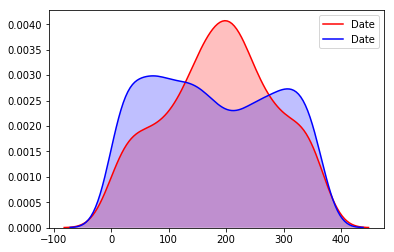

In [10]:
new_data1=df_train[df_train["Location"]=="Albury"]
new_data1.tail()
p1=sns.kdeplot(new_data1["Date"][df_train["RainTomorrow"]=="Yes"], shade=True, color="r")
p1=sns.kdeplot(new_data1['Date'][df_train["RainTomorrow"]=="No"], shade=True, color="b")


In [11]:
df_train.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142188,171,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
142189,172,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
142190,173,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
142191,174,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
142192,175,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [12]:
#missing data
total = obj_df.isnull().sum().sort_values(ascending=False)
percent = (obj_df.isnull().sum()/obj_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(24)

,Total,Percent
WindDir9am,10013,0.070418
WindGustDir,9330,0.065615
WindDir3pm,3778,0.026570
RainToday,1406,0.009888
RainTomorrow,0,0.000000
Location,0,0.000000


In [13]:

# Specify the columns to encode then fit and transform
newdata=[]

encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["Location","WindGustDir","WindDir9am","WindDir3pm",
                                                                "RainToday"])
encoder.fit(df_train, verbose=1)

# Only display the first 8 columns for brevity

transform_data=encoder.transform(df_train)
transform_data['RainTomorrow'] = transform_data['RainTomorrow'].map({'Yes': 1, 'No': 0})
transform_data.head()

,intercept,Date,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,RainTomorrow
0,1,336,-0.979592,-0.959184,-0.938776,-0.918367,-0.897959,-0.877551,-0.857143,-0.836735,...,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-0.666667,-0.333333,0
1,1,337,-0.979592,-0.959184,-0.938776,-0.918367,-0.897959,-0.877551,-0.857143,-0.836735,...,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-0.666667,-0.333333,0
2,1,338,-0.979592,-0.959184,-0.938776,-0.918367,-0.897959,-0.877551,-0.857143,-0.836735,...,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-0.666667,-0.333333,0
3,1,339,-0.979592,-0.959184,-0.938776,-0.918367,-0.897959,-0.877551,-0.857143,-0.836735,...,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-0.666667,-0.333333,0
4,1,340,-0.979592,-0.959184,-0.938776,-0.918367,-0.897959,-0.877551,-0.857143,-0.836735,...,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-0.666667,-0.333333,0


In [14]:
transform_data['RainTomorrow'].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [15]:
imp = IterativeImputer(max_iter=10, random_state=0)
new_df = imp.fit_transform(transform_data)
new_df.shape
imputed_data=pd.DataFrame(new_df,columns=transform_data.columns)

In [16]:
#missing data
total = imputed_data.isnull().sum().sort_values(ascending=False)
percent = (imputed_data.isnull().sum()/imputed_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [18]:
imputed_data.head()

,intercept,Date,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,RainTomorrow
0,1.0,336.0,-0.979592,-0.959184,-0.938776,-0.918367,-0.897959,-0.877551,-0.857143,-0.836735,...,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-0.666667,-0.333333,0.0
1,1.0,337.0,-0.979592,-0.959184,-0.938776,-0.918367,-0.897959,-0.877551,-0.857143,-0.836735,...,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-0.666667,-0.333333,0.0
2,1.0,338.0,-0.979592,-0.959184,-0.938776,-0.918367,-0.897959,-0.877551,-0.857143,-0.836735,...,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-0.666667,-0.333333,0.0
3,1.0,339.0,-0.979592,-0.959184,-0.938776,-0.918367,-0.897959,-0.877551,-0.857143,-0.836735,...,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-0.666667,-0.333333,0.0
4,1.0,340.0,-0.979592,-0.959184,-0.938776,-0.918367,-0.897959,-0.877551,-0.857143,-0.836735,...,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-0.666667,-0.333333,0.0


In [19]:
x = imputed_data.values #returns a numpy array
x_scaled = preprocessing.normalize(x)
scaled_data = pd.DataFrame(x_scaled,columns=imputed_data.columns)
scaled_data.head()

,intercept,Date,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,RainTomorrow
0,0.000682,0.229015,-0.000668,-0.000654,-0.000640,-0.000626,-0.000612,-0.000598,-0.000584,-0.000570,...,0.016358,0.048393,0.014995,0.686840,0.686431,0.011519,0.014859,-0.000454,-0.000227,0.0
1,0.000681,0.229451,-0.000667,-0.000653,-0.000639,-0.000625,-0.000611,-0.000597,-0.000584,-0.000570,...,0.014979,0.029958,0.017022,0.688082,0.686175,0.011711,0.016545,-0.000454,-0.000227,0.0
2,0.000681,0.230283,-0.000667,-0.000654,-0.000640,-0.000626,-0.000612,-0.000598,-0.000584,-0.000570,...,0.017714,0.025890,0.020439,0.686490,0.687239,0.014308,0.015806,-0.000454,-0.000227,0.0
3,0.000677,0.229538,-0.000663,-0.000649,-0.000636,-0.000622,-0.000608,-0.000594,-0.000580,-0.000567,...,0.006094,0.030470,0.010834,0.689019,0.685769,0.012256,0.017943,-0.000451,-0.000226,0.0
4,0.000680,0.231240,-0.000666,-0.000652,-0.000638,-0.000625,-0.000611,-0.000597,-0.000583,-0.000569,...,0.013602,0.055770,0.022444,0.687464,0.684200,0.012106,0.020200,-0.000453,-0.000227,0.0


In [41]:
pca = PCA(n_components=5)
pcaData=pca.fit_transform(imputed_data[imputed_data.columns[:-1]])

In [42]:
pcaData.shape
pcaData=pd.DataFrame(pcaData,columns=["comp1","comp2","comp3", "comp4", "comp5"])
pcaData["RainTomorrow"]=imputed_data.RainTomorrow
pcaData.head()

,comp1,comp2,comp3,comp4,comp5,RainTomorrow
0,156.651415,19.954231,0.161251,-7.864136,22.066541,0.0
1,158.047787,34.249717,-3.367217,0.084887,3.904953,0.0
2,159.130625,36.751820,8.819009,3.034266,-2.819650,0.0
3,159.812314,38.190354,-24.897295,4.439828,2.363982,0.0
4,160.060406,7.049810,-5.290460,5.778915,29.659578,0.0


In [43]:
pcaData.tail()

,comp1,comp2,comp3,comp4,comp5,RainTomorrow
142188,-8.007747,20.444835,-19.515206,-14.139744,-2.858543,0.0
142189,-6.910456,28.016727,-20.731791,-11.730195,-5.853401,0.0
142190,-6.127590,26.800935,-28.549985,-7.996778,-1.006863,0.0
142191,-5.068086,28.985584,-16.776827,-7.045859,0.730746,0.0
142192,-4.156728,29.992461,-21.077017,-1.570760,-1.924577,0.0


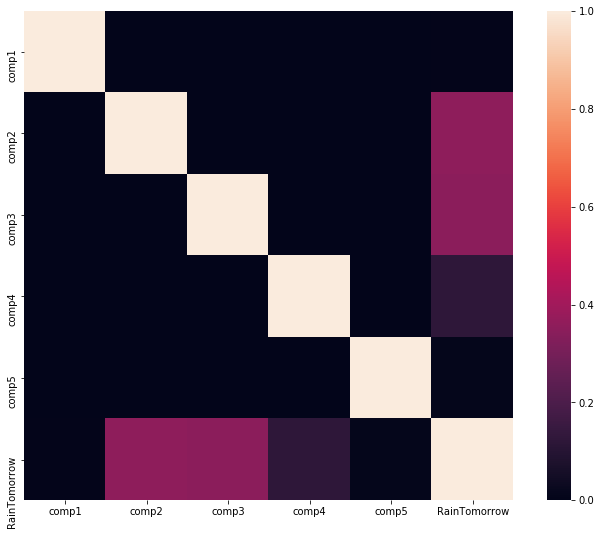

In [44]:
corrmat = pcaData.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

In [56]:
train, test = train_test_split(pcaData, test_size=0.2)

In [57]:
clf = RandomForestClassifier(n_estimators=500, max_depth=4, random_state=0, oob_score = True)

In [58]:
clf.fit(train[train.columns[:-1]], train["RainTomorrow"])
clf.oob_score_

0.83225205267507074

In [59]:
clf.score(test[test.columns[:-1]], test["RainTomorrow"])

0.82858047048067796